# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [13]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '5_September'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [14]:
# Read in data
df = pd.read_parquet("classification.parquet")


# Eliminate players who maximum number of gambles is 1
df = df.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Reset index
df.index = np.arange(1, len(df) + 1)


# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [15]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [16]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [17]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 11166
--------------------------------------------------
Number of unique visits in dtf: 18
--------------------------------------------------
Number of unique sessions in dtf: 10
--------------------------------------------------


### Wins in a row

In [18]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [19]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                        #2ws    #3ws    #4ws
clasification visit                         
extreme_r     1      22974.0  4185.0  1257.0
              2      16106.0  2938.0   856.0
              3       7504.0  1370.0   436.0
              4       3430.0   625.0   185.0
              5       1099.0   200.0    61.0
              6        481.0    97.0    45.0
              7        213.0    37.0    11.0
              8         69.0    18.0     7.0
              9         71.0    21.0     8.0
              10        59.0    15.0    13.0
              11        45.0     8.0     6.0
              12        21.0     7.0     4.0
              13        58.0    21.0     6.0
              14        20.0     3.0     1.0
              15         6.0     1.0     0.0
              16         5.0     0.0     1.0
              17         5.0     1.0     0.0
              18         5.0     1.0     0.0
high_r        1       8634.0  1589.0   488.0
              2 

### Gender Differences

In [20]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
extreme_r      F         1339
               M         1470
high_r         F         1341
               M         1461
low_r          F         1305
               M         1534
minimum_r      F         1271
               M         1445
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [21]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

In [22]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
extreme_r      18-24          15
               25-40         514
               41-55        1030
               56-75        1147
               76+           103
high_r         18-24          49
               25-40         742
               41-55         977
               56-75         951
               76+            83
low_r          18-24          67
               25-40         853
               41-55         963
               56-75         897
               76+            59
minimum_r      18-24          94
               25-40        1021
               41-55         832
               56-75         727
               76+            42
Name: playerkey, dtype: int64
--------------------------------------------------


In [23]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
extreme_r      Gen Z             15
               Millenials       514
               Gen X           1030
               Baby Boomers    1147
               Silent           103
high_r         Gen Z             49
               Millenials       742
               Gen X            977
               Baby Boomers     951
               Silent            83
low_r          Gen Z             67
               Millenials       853
               Gen X            963
               Baby Boomers     897
               Silent            59
minimum_r      Gen Z             94
               Millenials      1021
               Gen X            832
               Baby Boomers     727
               Silent            42
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24     110
25-40    1833
41-55    2036
56-75    1807
76+       124
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24     115
25-40    1297
41-55    1766
56-75    1915
76+       163
Name: playerkey, dtype: int64


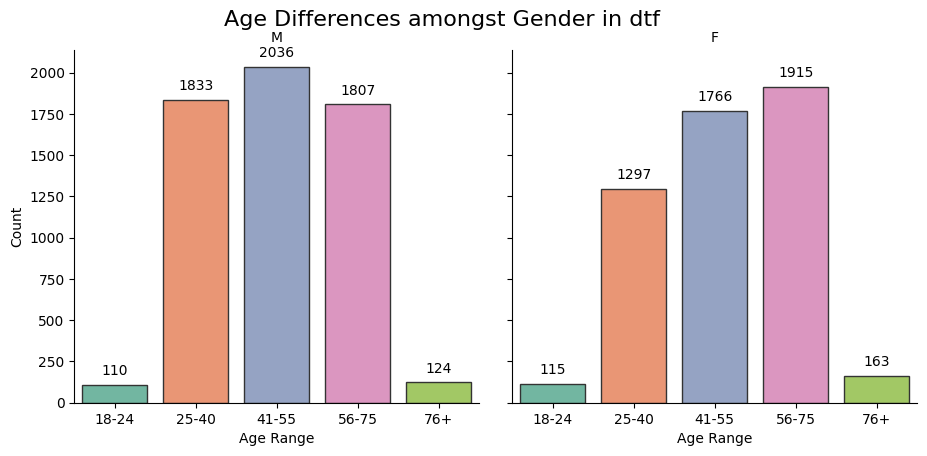

In [24]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [25]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 4213
Count of times each player increase_slotdeno : {14: 21, 48: 1, 94: 1, 95: 2, 113: 4, 156: 24, 171: 1, 224: 7, 247: 7, 332: 5, 336: 9, 611: 3, 646: 5, 719: 174, 841: 4, 865: 1, 901: 15, 978: 7, 989: 2, 1029: 3, 1032: 1, 1069: 3, 1136: 5, 1147: 2, 1166: 73, 1175: 3, 1194: 2, 1213: 3, 1233: 5, 1263: 1, 1402: 3, 1408: 1, 1438: 1849, 1515: 5, 1553: 2, 1660: 9, 1699: 1, 1715: 12, 1757: 139, 1932: 1, 1950: 4, 1953: 1, 1959: 2, 2004: 10, 2005: 89, 2054: 5, 2067: 4, 2073: 7, 2097: 6, 2155: 2, 2198: 1, 2214: 6, 2235: 1, 2332: 2, 2341: 3, 2431: 4, 2442: 21, 2459: 8, 2569: 1, 2570: 5, 2595: 4, 2710: 3, 2736: 7, 2806: 2, 2817: 2, 2858: 10, 2949: 1, 2981: 3, 2993: 37, 3010: 7, 3120: 31, 3127: 15, 3231: 2, 3248: 3, 3260: 2, 3265: 5, 3271: 1, 3306: 12, 3359: 4, 3360: 10, 3385: 7, 3677: 23, 3708: 2, 3711: 2, 3756: 1, 3783: 3, 3840: 3, 3933: 4, 3955: 4, 4022: 1, 4051: 1, 4269: 1, 4270: 1, 4333: 6, 4483: 37, 4554: 2, 4652: 1, 4688: 1, 4699: 4, 4874: 2, 4875: 

### Wealth Differences
#### General

In [26]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


# Observe all the NaN Values

In [27]:
# Count how many Nan values are in df
print("Number of Nan values in df:", df.isna().sum().sum())

# Print the columns with Nan values
print("Columns with Nan values in df:", df.columns[df.isna().any()].tolist())

Number of Nan values in df: 21350
Columns with Nan values in df: ['profit/bet']


#### Per Visit

In [28]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_v_chunk = pf.transform_ml(data_b=chunk_df, grouping='visit')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_v_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_v = pd.concat(results)

# Now 'df_ML_v' contains the results from all chunks combined into a single DataFrame

Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [29]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  11166
Number of discrepancies: 284
Number of unique players w/o discrepancies:  10882


In [30]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_ALL.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [31]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [32]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df_s[i:i + chunk_size] for i in range(0, df_s.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_s_chunk = pf.transform_ml(data_b=chunk_df, grouping='session_time')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_s_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_s = pd.concat(results)


Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [33]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  11166
Number of discrepancies: 289
Number of unique players w/o discrepancies:  10877


In [34]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_ALL.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '